# PROC SGPLOT

In the previous section, we explored creating bar graphs within a `proc freq` step. However, this approach offers limited customization options. By using a different procedure, `proc sgplot`, we can easily produce a wide range of high-quality statistical graphics with greater flexibility and layering options. This procedure is commonly used to generate scatter plots, bar charts, line plots, histograms, box plots, and more. It is part of the SAS ODS Graphics system, which allows users to visualize data effectively for analysis and reporting.

:::{admonition} *General `PROC SGPLOT` statement*
:class: dropdown

```
PROC SGPLOT DATA = input-table <options>;
     plot statement(s) / <options>;
    <appearance statements>;
   <additional filtering/formatting/etc>;
RUN;

```
1. `PROC SGPLOT DATA = input-table <options>;`
   - `PROC SGPLOT` starts the procedure, and `DATA = input-table` specifies the dataset you want to use for the plot
   - `<options>` within PROC SGPLOT can include additional procedure-level settings
2. `plot statement(s) / <options>;`
   - The `plot statement(s)` specify the type of plot you want to create, such as scatter, vbar, hbar, series, or histograms. Multiple plot statements can be included to layer different types of graphs on the same chart.
   - The `/ <options>` allows for plot-specific customization, such as setting labels, colors, markers, or axis opti
3. `<appearance statements>;`
   - these statements control the overall appearance of the plot, such as adding titles, labels, legends, or setting axis attributes
5. `<additional filtering/formatting/etc>`
   - this section can include additional options to refine the plot, including filtering data, formatting the value output.

Here's an example of a simple vertical bar chart below.

### Example 1


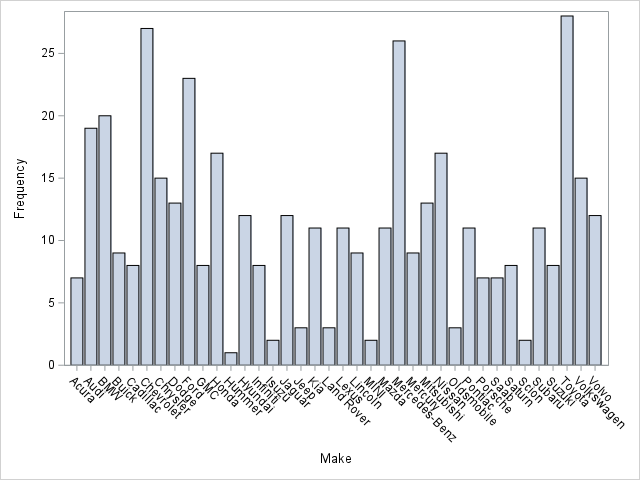

In [10]:
proc sgplot data=sashelp.cars;
    vbar Make;
run;

:::{admonition} (ex.1) Code Breakdown:
:class: important

The code above create a vertical bar chart showing the count of each unique car make in the sashelp.cars dataset. Additionally, there was no custom option set so the default behavior was used (ie the nvalues appear are counts and not percent or average).

Let's modify it below by setting the y-axis, or response variable, to a numeric value from our dataset: MSRP. We’ll also specify that we want the bars to represent the average MSRP for each car make. Our options will always be in the same statement as the plot and will be indicated by the `/`.

Let's also change the color of the bars to be a green instead of blue.

:::


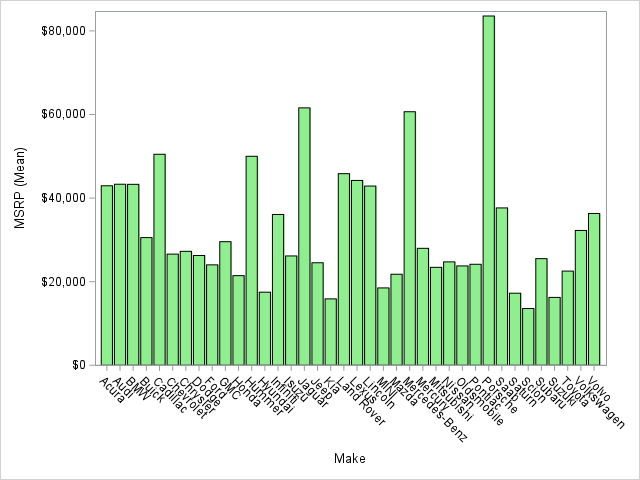

In [24]:
proc sgplot data = sashelp.cars;
    vbar Make / response=MSRP stat=mean fillattrs=(color=lightgreen);
run;

The plot above shows the average MSRP for each car make in the color `lightgreen`. Here, we can clearly see that cars of the Make Porsche have the highest average MSRP.

### Plot Compatibility
A key advantage of `sgplot` is the ability to layer multiple types of plots. Plot types are grouped into categories: Basic, Distribution, Fit and Confidence, and Categorization. However, only certain plot types can be layered together. Please refer to the table below to see which plots belong to each category.

:::{admonition} Plots
:class: dropdown

| BASIC        | DISTRIBUTION | FIT AND CONFIDENCE | CATEGORIZATION |
|--------------|--------------|--------------------|----------------|
| Band         | Density      | Ellipse           | Dot            |
| Bubble       | Hbox         | Loess             | Hbar           |
| Block        | Histogram    | Pbspline          | Hbarbasic      |
| Dropline     | Vbox         | Reg               | Hline          |
| Ellipseparm  |              |                   | Vbar           |
| Hbarparm     |              |                   | Vbarbasic      |
| Heatmap      |              |                   | Vline          |
| Heatmapparm  |              |                   | Waterfall      |
| Highlow      |              |                   |                |
| Lineparm     |              |                   |                |
| Needle       |              |                   |                |
| Polygon      |              |                   |                |
| Refline      |              |                   |                |
| Scatter      |              |                   |                |
| Series       |              |                   |                |
| Spline       |              |                   |                |
| Step         |              |                   |                |
| Text         |              |                   |                |
| Vbarparm     |              |                   |                |
| Vector       |              |                 
:::
Basic plots are compatible with other Basic plots as well as Fit & Confidence plots. Distribution plots can be layered with other Distribution plots, and Categorization plots are compatible with other Categorization plots. When we say "compatible," we mean that these plots can be layered on top of each other.

Please refer to the documentation here for more information: https://documentation.sas.com/doc/en/pgmsascdc/9.4_3.5/grstatproc/p0yud64khw8fuin1xgr85dgxbb7t.htm  |                |


### "Param" Plots
You may have noticed different variations of plots, ie `vbar/hbar` and `vbarparm/hbarparm`. While these plots all create bar charts, there are important differences in how they handle data and when each should be used. Here are the key differences: 

| Feature                 | VBAR / HBAR                                 | VBARPARM / HBARPARM                         |
|-------------------------|---------------------------------------------|---------------------------------------------|
| Data Requirements       | Raw data                                    | Pre-summarized data                         |
| Automatic Summarization | Yes                                         | No                                          |
| Response Variable       | Optional                                    | Required                                    |
| Typical Use Case        | Counts, frequencies, or simple statistics (e.g., mean) | Custom metrics or already aggregated da


`vbar` and `hbar` automatically count or summarize data within `proc sgplot`. This is most ideal with raw data. `vbarparm` and `hbarparm` do not perform any calculations on the data, they plot the data "as-is". This plot is ideal when you already have calculated values in the dataset that you want to display.

:::{tip}
More so, all plot types that end with "parm" (like `VBARPARM`, `HBARPARM`, `ELLIPSEPARM`, and `LINEPARM`) require pre-summarized or pre-calculated data. These "parm" plot types do not perform any internal calculations or aggregations, and they expect the values you provide to be final and ready for plotting.
:::a  |


### Example 2
Let's try an example with layering plots. 


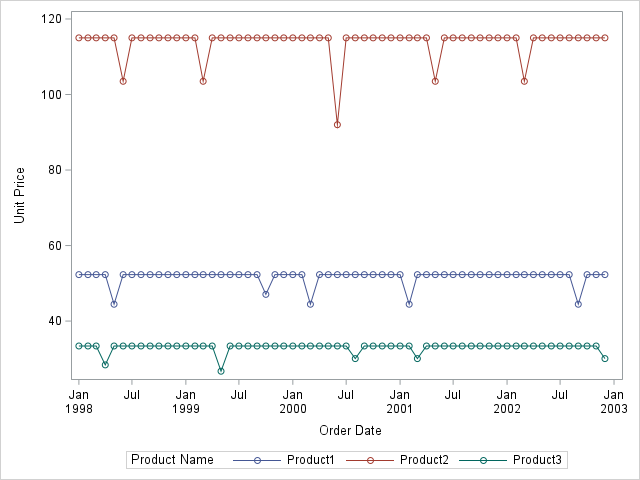

In [42]:
proc sgplot data=sashelp.pricedata;
    series x=date y=price / group=ProductName markers;
    where ProductName IN ('Product1', 'Product2', 'Product3');
run;

:::{admonition} (ex.2) Code Breakdown:
:class: important

This code creates a time series plot using `PROC SGPLOT` for the `sashelp.pricedata` dataset. 

- `
series x=date y=pric`e: Creates a line plot (series plot) with Date on the x-axis and Price on the y-axis
- `
group=ProductNa`me: Groups the lines by ProductName, resulting in separate lines for each specified produc
- `.
mark`ers: Adds markefor at each data point along the lines, making it easier to see individual observatio
- `s.
where ProductName IN ('Product1', 'Product2', 'Produc`t3'): Filters the dataset to only include Product1, Product2, and Prod in the plot

BUT, you can also create this plot and achieve the same effect by layering a `scatter` with a `series` (see below).ct3.

:::


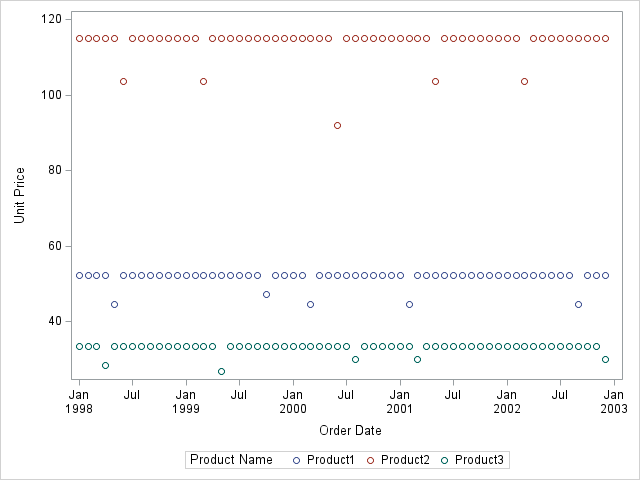

In [54]:
/* create a scatter with the price data by Product first */
proc sgplot data=sashelp.pricedata;
    scatter x=Date y=price / group=ProductName;
    where ProductName IN ('Product1', 'Product2', 'Product3');
run;


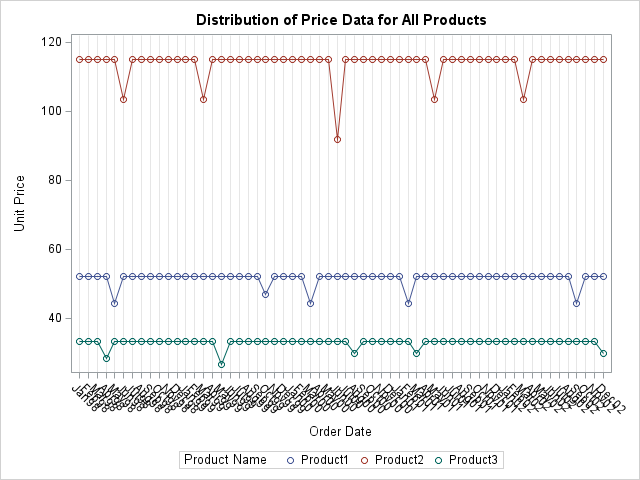

In [123]:
/* next layer with series and also change plot to have xaxis grids (not including y axis) */
proc sgplot data=sashelp.pricedata;
    scatter x=Date y=price / group=ProductName;
    series x=Date y=price / group=ProductName;
    xaxis type= DISCRETE GRID;
    where ProductName IN ('Product1', 'Product2', 'Product3');
run;

### Example 3


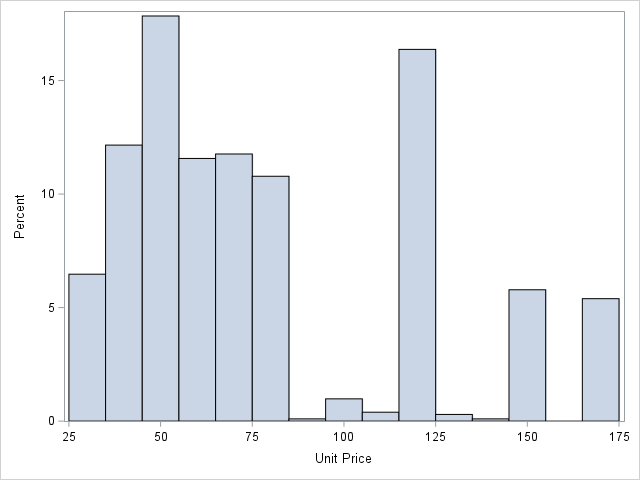

In [63]:
proc sgplot data=sashelp.pricedata;
    histogram price;
run;


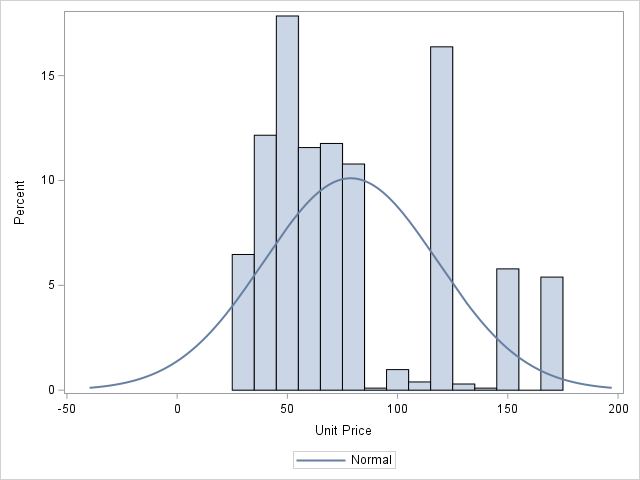

In [65]:
proc sgplot data=sashelp.pricedata;
    histogram price;
    density price;
run;


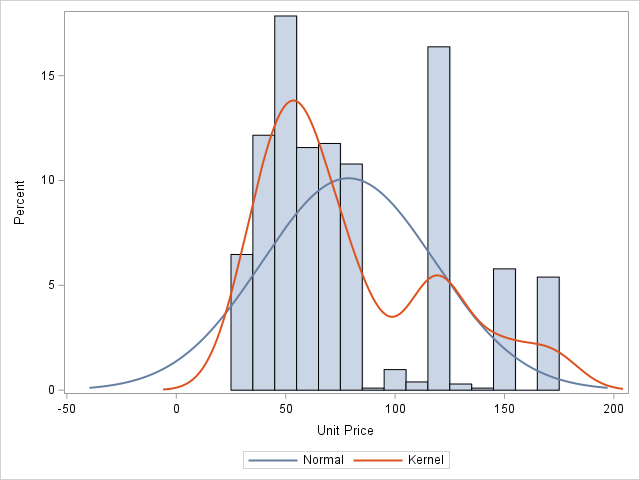

In [71]:
proc sgplot data=sashelp.pricedata;
    histogram price;
    density price;
    density price / type=kernel;
run;

:::{admonition} (ex.3) Code Breakdown:
:class: important

This codes above show 3 different distribution plots: one with just a histogram, one with a histogram with a normal density plot overlay, and one with a histogram, normal denisty, and a kernel density overlayed.

- `histogram price`: Creates a histogram of the price variable, showing the frequency distribution of price values.
- `
density pric`e: Adds a normal density curve over the histogram. This curve represents a normal distribution fit based on the data
- `
density price / type=kern`el: Adds a kernel density curve, which is a non-parametric way to estimate the probability density function of the data. The kernel density gives a smoother, data-driven representation of the distributio

Below we customize the histogram color and desnisty lines a bit further by changing the colors, you can read more on line customization on the documentation here: https://documentation.sas.com/doc/en/pgmsascdc/9.4_3.5/grstatproc/p0er4dg9tojp05n1sf7maeqdz1d8.htm and coloring: https://documentation.sas.com/doc/en/pgmsascdc/9.4_3.5/grstatproc/p0edl20cvxxmm9n1i9ht3n21eict.htm, we also create a title for this plot.n.
:::


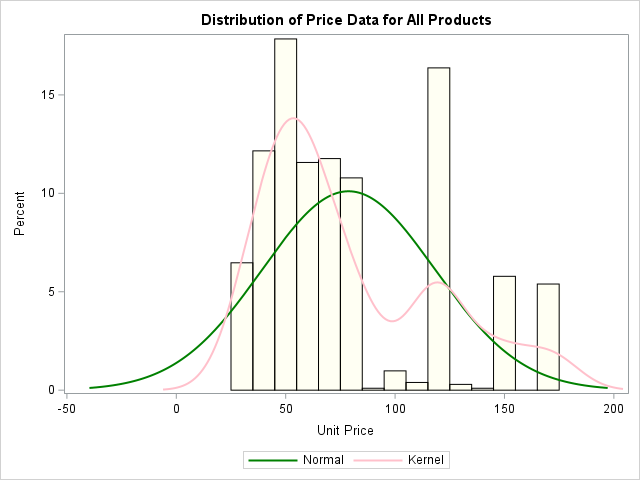

In [111]:
/* change color of density lines and of histogram*/
proc sgplot data=sashelp.pricedata;
    histogram price / fillattrs=(color="yellow" transparency=0.95);
    density price / lineattrs=(color="green");
    density price / type=kernel lineattrs=(color="pink");
    title 'Distribution of Price Data for All Products';
run;

Please please please note that there a lot of different plots that you can create with `proc sgplot`, alwasy refer to the documentation to see what other customization options you can achieve: https://documentation.sas.com/doc/en/pgmsascdc/9.4_3.5/grstatproc/n0yjdd910dh59zn1toodgupaj4v9.htm

## PROC SGPANEL

`PROC SGPANEL` in SAS is a procedure for creating multi-panel plots, allowing you to visualize data across multiple categories or groups within a single graphical output. Unlike `PROC SGPLOT`, which generates single-pane plots, `PROC SGPANEL` automatically arranges plots into a grid layout by specifying paneling variables. These variables (using PANELBY) determine how data is split across panels, so you can view patterns within subsets of data side-by-side. `PROC SGPANEL` supports many of the same plot types as `PROC SGPLOT`, such as bar charts, scatter plots, and series plots, but it adds the flexibility to compare these plots across multiple dimensions in a structured layout.

## Example 1


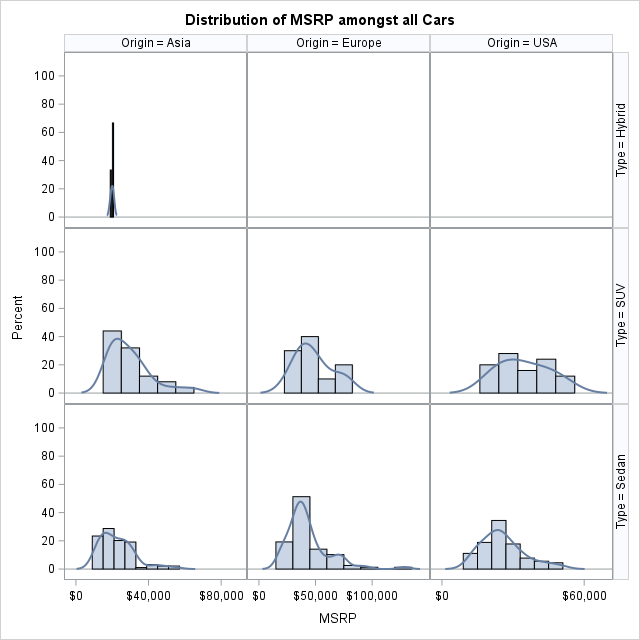
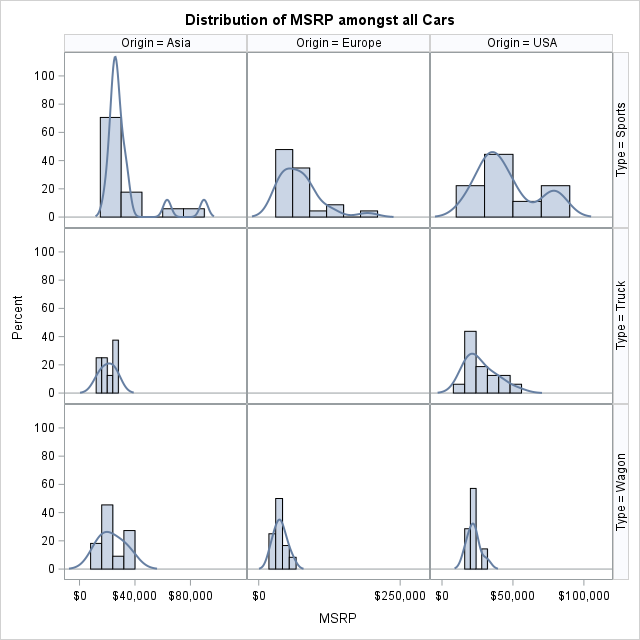

In [161]:
proc sgpanel data=sashelp.cars noautolegend;
    title 'Distribution of MSRP amongst all Cars';
    panelby Origin Type / layout=lattice uniscale = row;
    histogram MSRP;
    density MSRP / type=kernel;
run;

:::{admonition} (ex.1) Code Breakdown:
:class: important

This `PROC SGPANEL` code generates a grid of histograms to show the distribution of MSRP (Manufacturer's Suggested Retail Price) for cars, split by the Origin and Type of each car

- `noautolegend`: Suppresses the automatic legend, which is unnecessary for this plot as each panel represents a different subset of data.
-  `:
panelby Origin T`ype: Creates a panel for each unique combination of Origin and Ty
-  `e.
layout=lat`tice: Arranges the panels in a grid (lattice layo
-  `t).
uniscal`e=row: Sets each row of panels to have the same y-axis scale, which makes comparisons across different Types within the same Origin ea
-  `ier.
histogra`m MSRP: Plots a histogram of MSRP within each 
-  `anel.
density MSRP / type`=kernel: Adds a kernel density curve over the histogram in each panel, providing a smoothed view of the distribution.
:::

## Saving/Exporting Plots
We can export the plots we create using `ods graphics`.
Here's an example of how to export our plot from `proc sgpanel` to a `png` file.


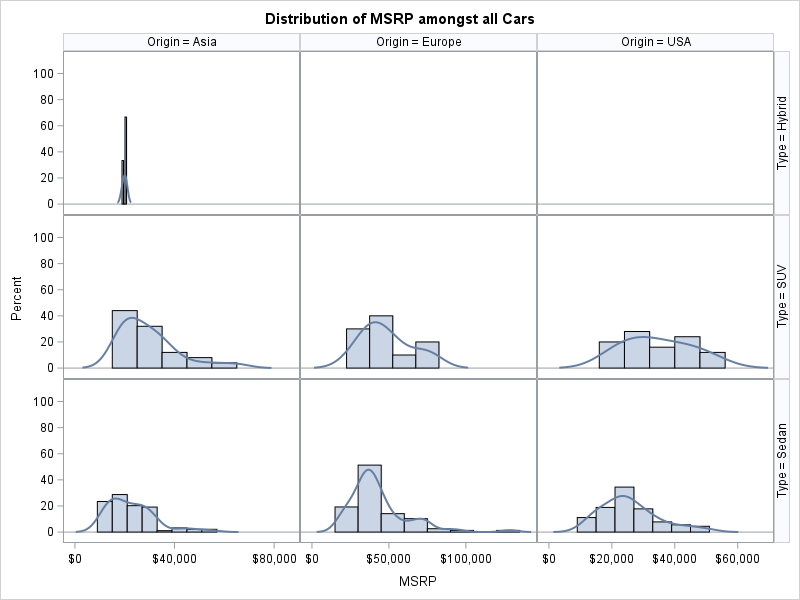
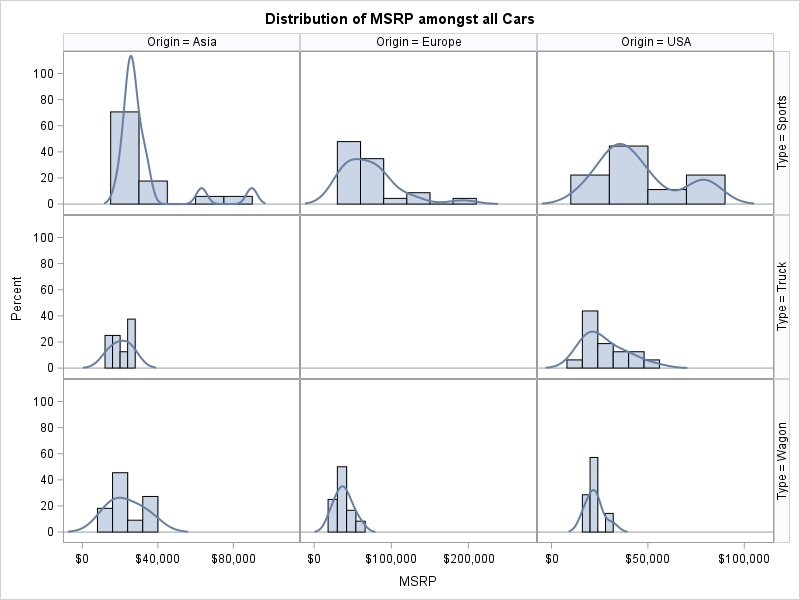

In [181]:
ods graphics / reset imagename="MSRP_Distribution_Origin_Type" IMAGEFMT=PNG 
    width=800px height=600px;
ods listing gpath="C:\rdominguez\";

proc sgpanel data=sashelp.cars noautolegend;
    title 'Distribution of MSRP amongst all Cars';
    panelby Origin Type / layout=lattice uniscale=row;
    histogram MSRP;
    density MSRP / type=kernel;
run;

ods listing close;

:::{admonition} Code Breakdown:
:class: important

This code saves a `proc sgpanel` plot as a PNG image in a specified directory.

- `ods graphics/reset imagename="MSRP_Distribution_Origin_Type" imagefmt=png width=800px height=600px`
  - `reset` clears any ods settings that were created previously
  - `imagename="MSRP_Distribution_Origin_Type` specifies the base name for the output image
  - `imagefmt=png` specifies the image will be saved as a `png`
  - `width, height` sets the dimensions of the image
- `ods listing gpath` specifies the filepath of where you want to save the plot
- `ods listing close` finalizes the png output and closes the destination
:::

In the code above, we can change the `imagefmt` to be a wide variety of objects such as `JPEG` or `SVG`. You can find a list of other possibilities online in the `ods graphics` SAS documentation.

Here's another example of how to output the same plot to a PDF:


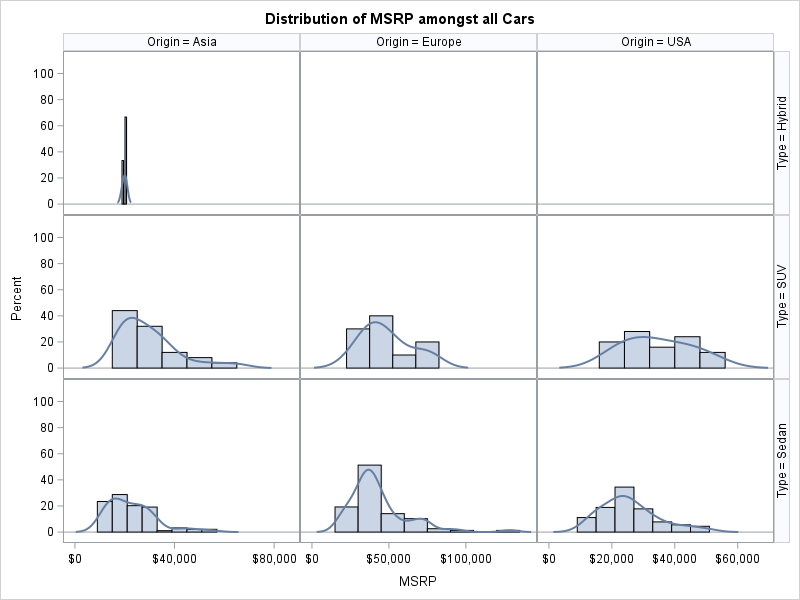
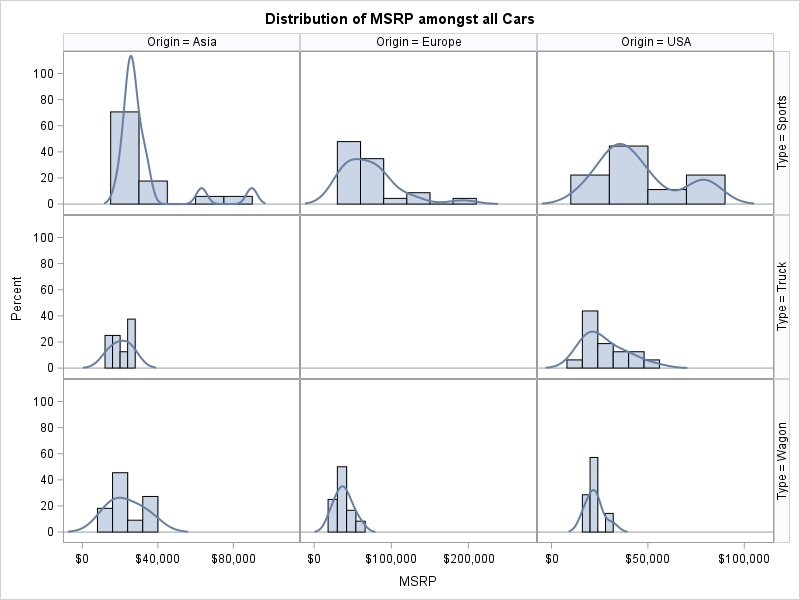

In [207]:
ods pdf file = 'msrp_distirbution.pdf';
proc sgpanel data=sashelp.cars noautolegend;
    title 'Distribution of MSRP amongst all Cars';
    panelby Origin Type / layout=lattice uniscale=row;
    histogram MSRP;
    density MSRP / type=kernel;
run;
ods pdf close;